In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
import matplotlib.pyplot as plt

In [2]:
# Read dataset file
df = pd.read_csv('BTC.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df

,Price
0,8245.7
1,8245.1
2,8529.0
3,8403.3
4,8006.0
...,...
1822,26920.0
1823,27183.9
1824,27035.3
1825,27403.1


In [3]:
# Split the data into training, testing, and validation sets with 5:3:2
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
#GPR model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])
# Define the kernel
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) + \
         RationalQuadratic(length_scale=1.0, alpha=0.1) + \
         ExpSineSquared(length_scale=1.0, periodicity=1.0, length_scale_bounds=(0.1, 10.0), periodicity_bounds=(0.1, 10.0)) + \
         WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-5, 1e5))

# Define the model
model = GaussianProcessRegressor(kernel=kernel, alpha=0.1, normalize_y=True)

# Train the model
model.fit(x_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__alpha is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\gaussian_process\kerne

GaussianProcessRegressor(alpha=0.1,
                         kernel=RBF(length_scale=1) + RationalQuadratic(alpha=0.1, length_scale=1) + ExpSineSquared(length_scale=1, periodicity=1) + WhiteKernel(noise_level=1),
                         normalize_y=True)

In [5]:
# make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred, y_std = model.predict(x_test, return_std=True)

# make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_vpred, y_vstd = model.predict(x_val, return_std=True)

In [6]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_vpred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_vpred) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_vpred - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 14604.013703421391
Testing RMSE: 35914.304351647756
Validation MAPE: 61.200599935707345
Testing MAPE: 75.30320693980782
Validation MAE: 13982.088720501823
Testing MAE: 33888.611826523054


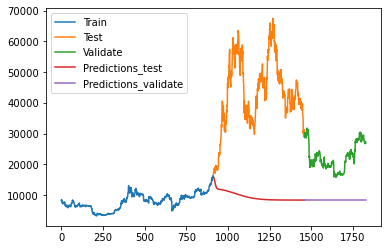

In [7]:

# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_vpred)
plt.legend(['Train', 'Test','Validate', 'Predictions_test','Predictions_validate'])
plt.show()